In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Carga de datos y descripción del dataset

In [29]:
with open("wine.names") as f:
    print(f.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [30]:
colnames = ['class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanids', 'Color_intensity', 'Hue', 'OD280/OD250', 'Proline']
DatosVino = pd.read_csv('wine.data', names = colnames)
DatosVino.sample(10)


,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
101,2,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562
23,1,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015
41,1,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035
32,1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
16,1,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
55,1,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


## Exploración de datos

In [31]:
DatosVino.describe()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

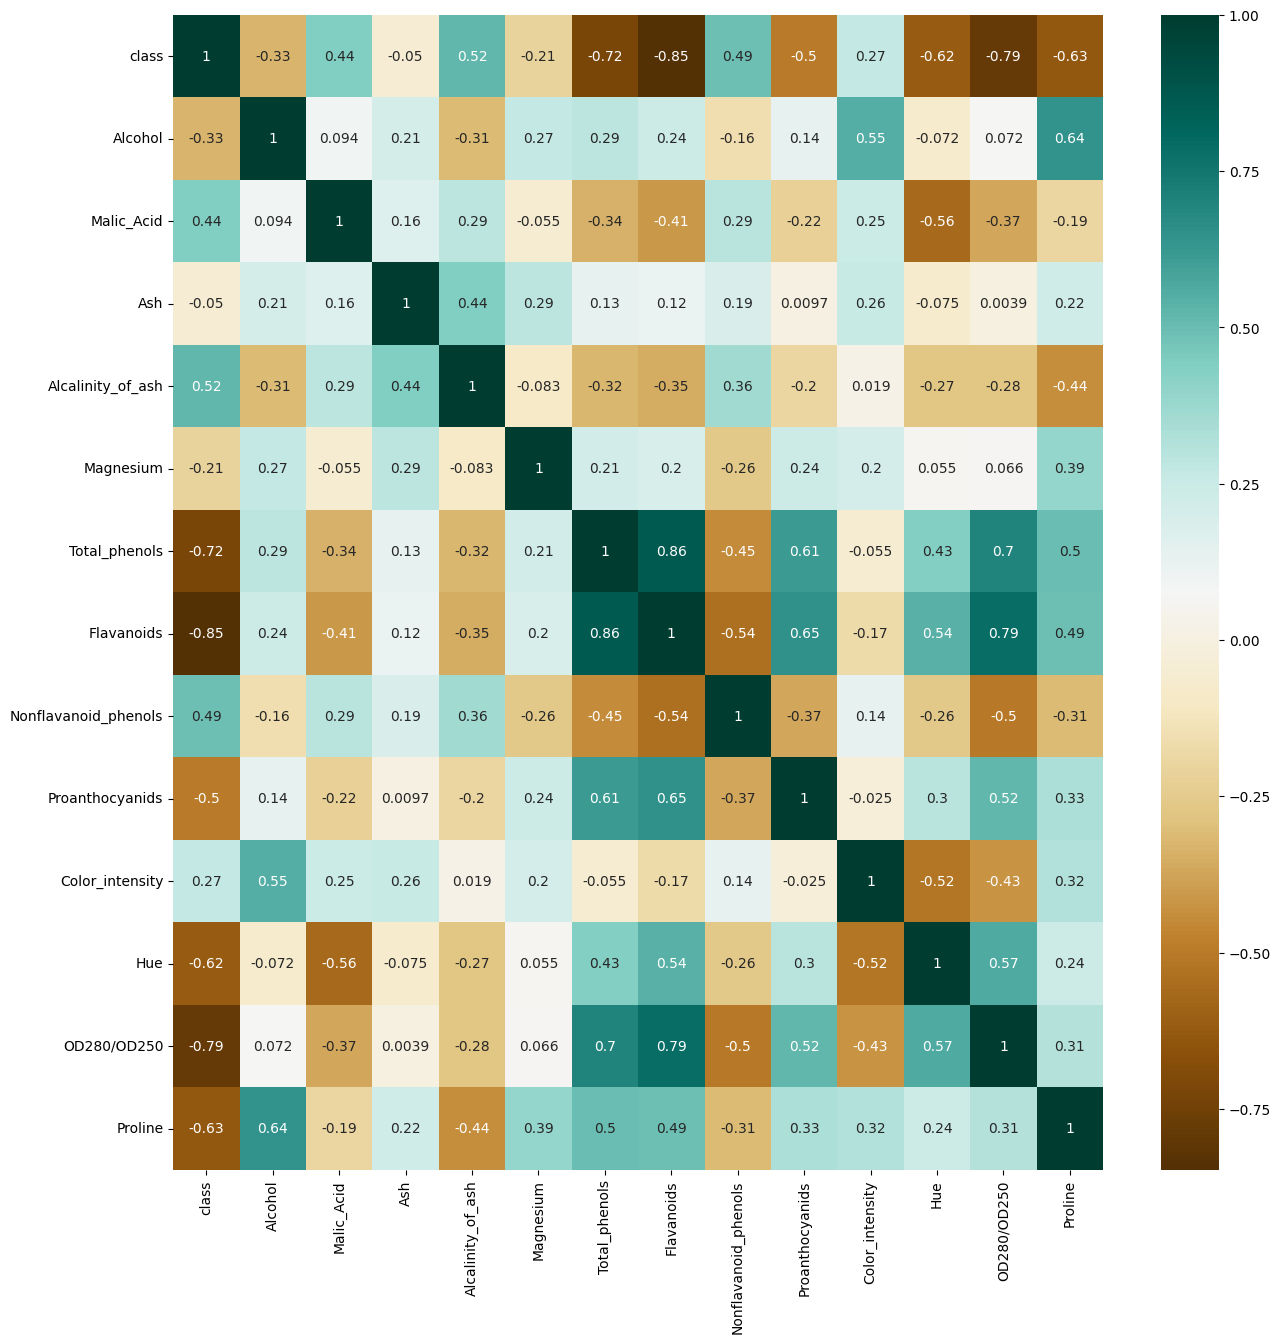

In [32]:

plt.figure(figsize = (15,15))
sns.heatmap(DatosVino.corr(), annot= True, cmap = 'BrBG')


Puede observarse que la variable objetivo tiene fuertes correlaciones negativas con Hue, OD280/OD250, Flavanoids y Total Phenols. También hay algunas variables que tienen una fuerte correlación positiva entre sí, tales como OD280/OD250 con Total Phenols y Flavanoids, y Flavanoids con Total Phenols. Esto debe tomarse en cuenta en la elaboración del modelo para no cometer overfitting.

También se separan los datos por clases de vino para ver mejor la distribición de los parámetros según la variable objetivo:

In [33]:
temp = DatosVino.loc[DatosVino['class'] == 1] 

temp.describe()


   

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
std,0.0,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767
min,1.0,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000
25%,1.0,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000
50%,1.0,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000
75%,1.0,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000
max,1.0,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000


In [34]:
temp = DatosVino.loc[DatosVino['class'] == 2] 

temp.describe()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
std,0.0,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,2.0,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000
50%,2.0,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000
75%,2.0,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000
max,2.0,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


In [35]:
temp = DatosVino.loc[DatosVino['class'] == 3] 

temp.describe()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833
std,0.0,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043
min,3.0,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,3.0,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000
50%,3.0,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000
75%,3.0,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000
max,3.0,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000


Vistos los estadísticos principales de los datos, es deseable también determinar cómo se distribuyen estos. Gráficamente es muy bueno realizar este proceso. A continuación, se muestra la distribución de los datos por variable, y agrupados según la variable objetivo, mediante gráficas de violín

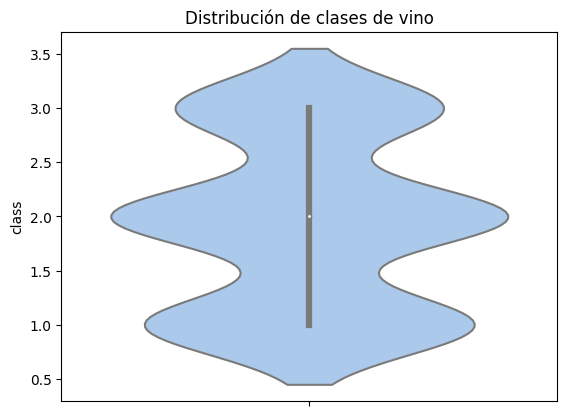

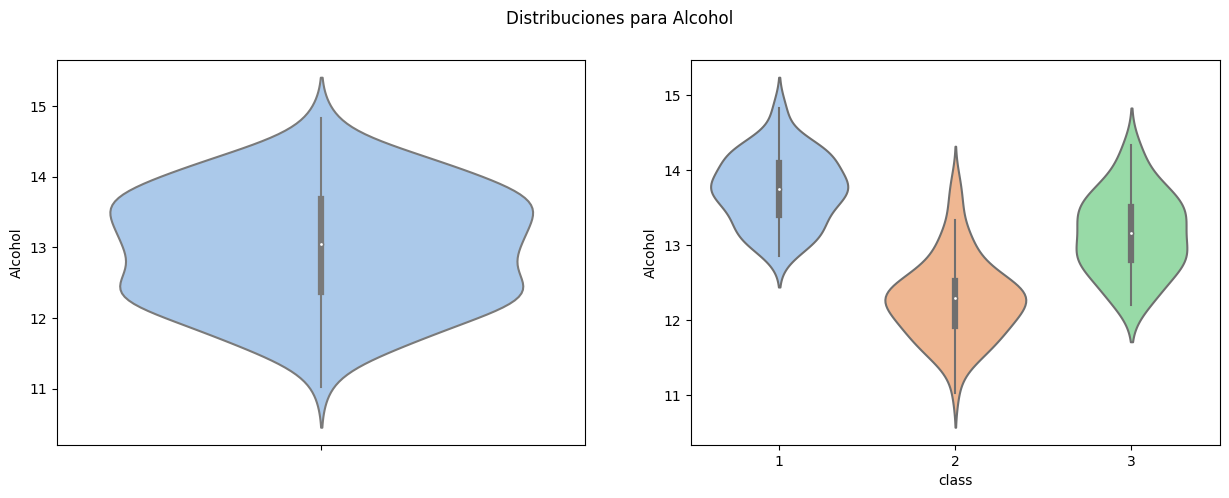

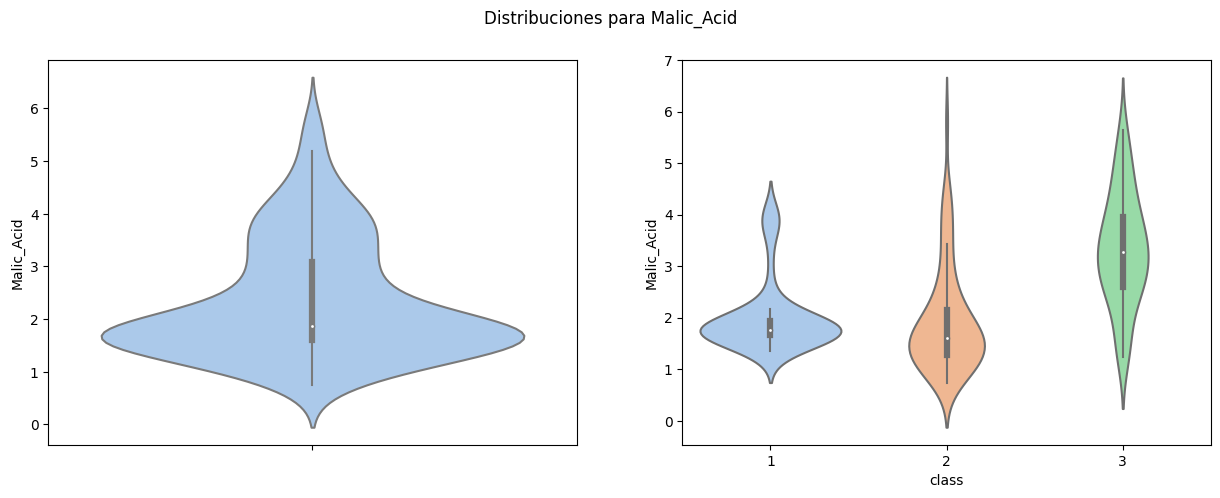

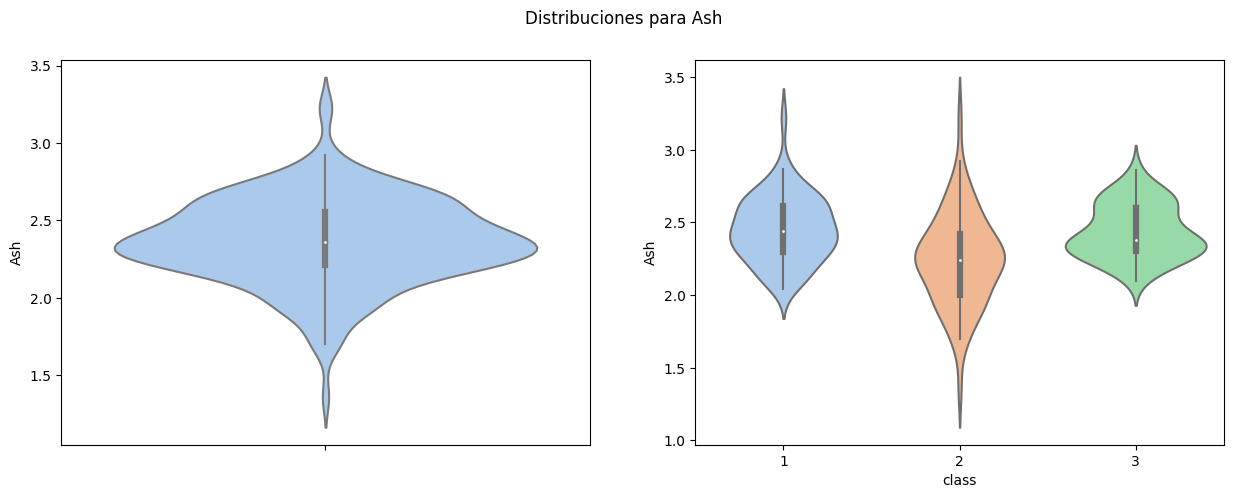

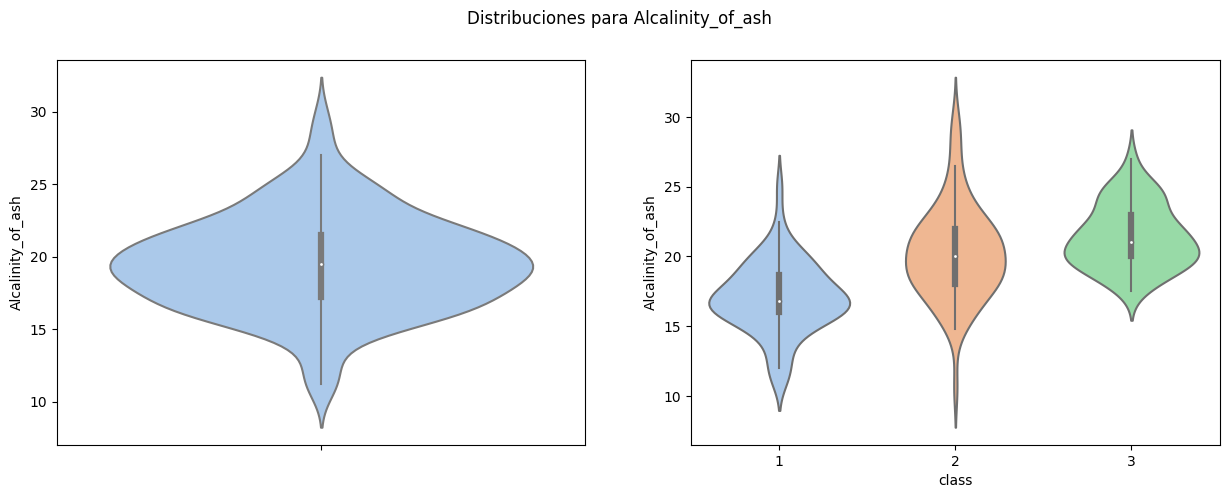

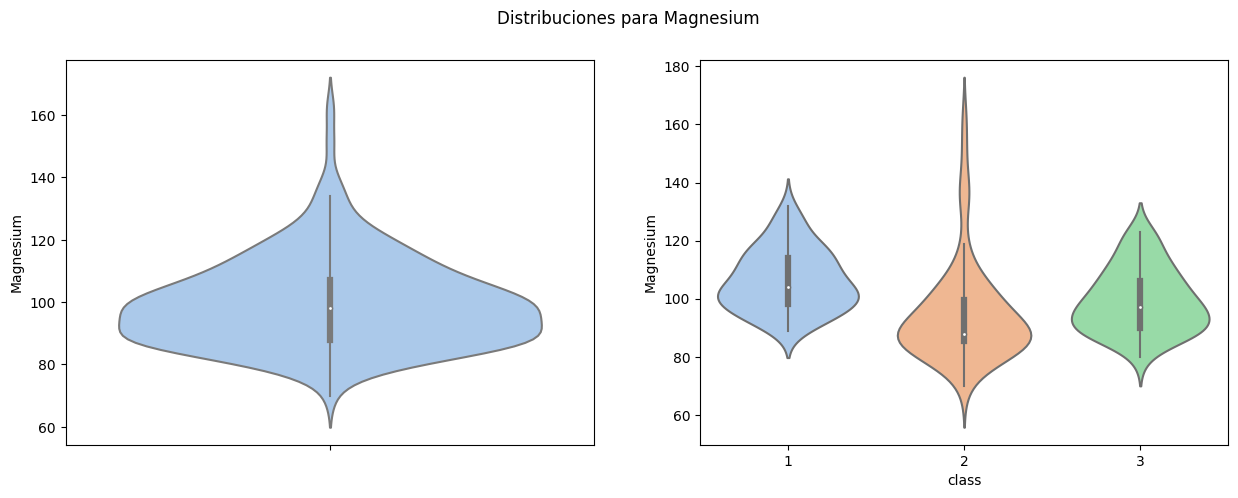

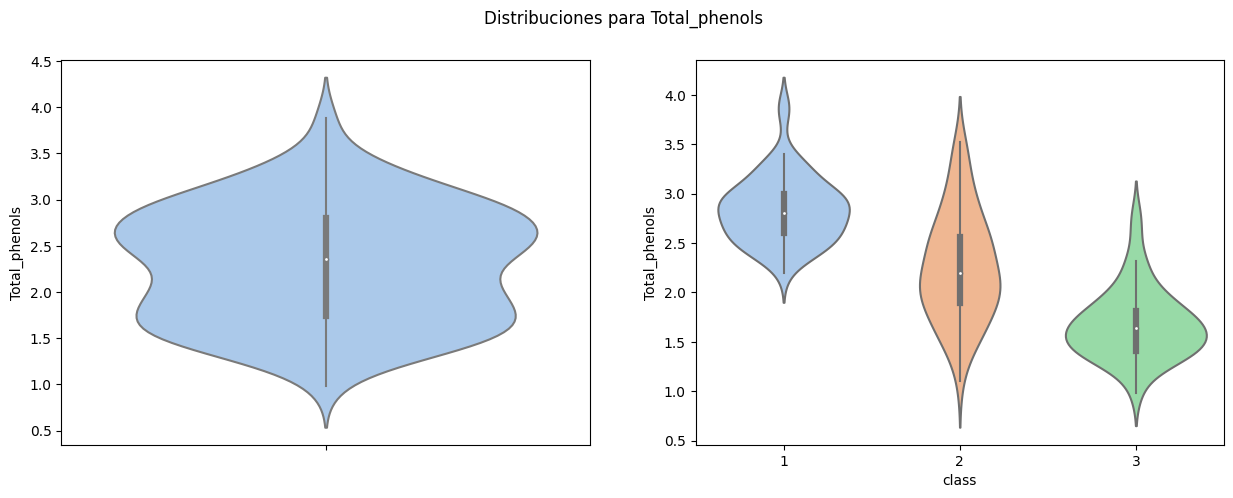

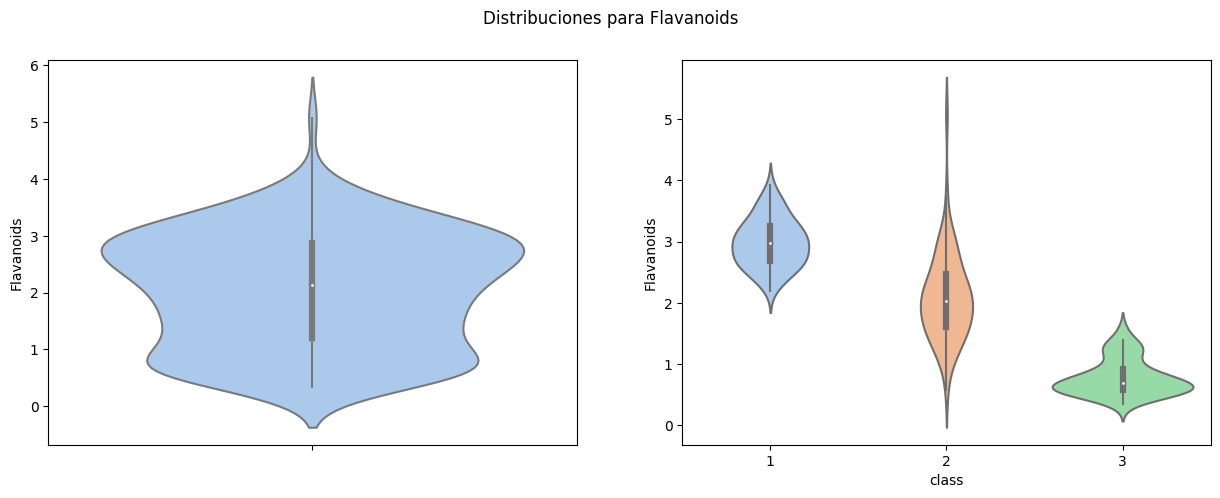

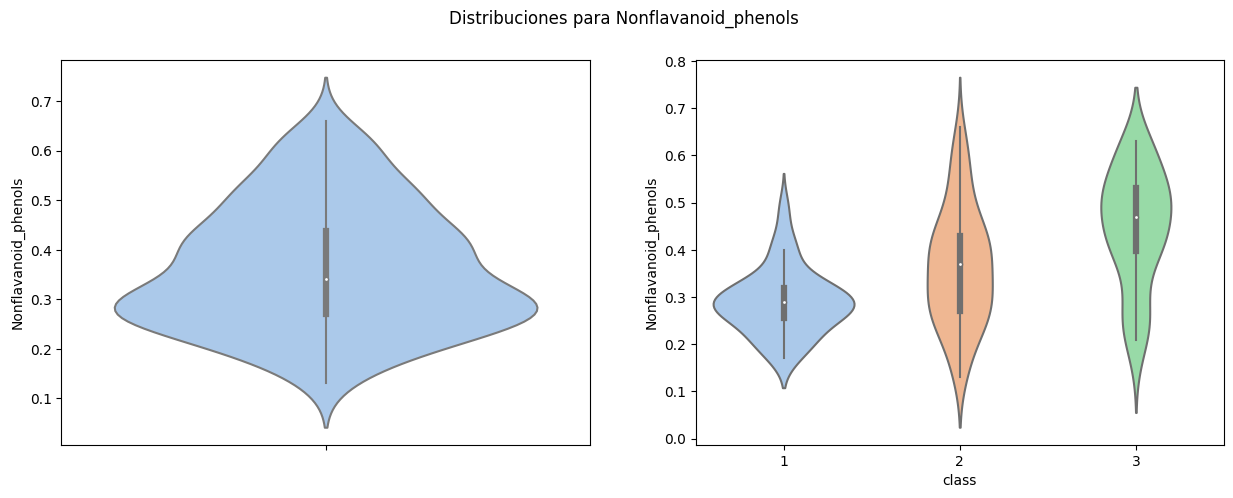

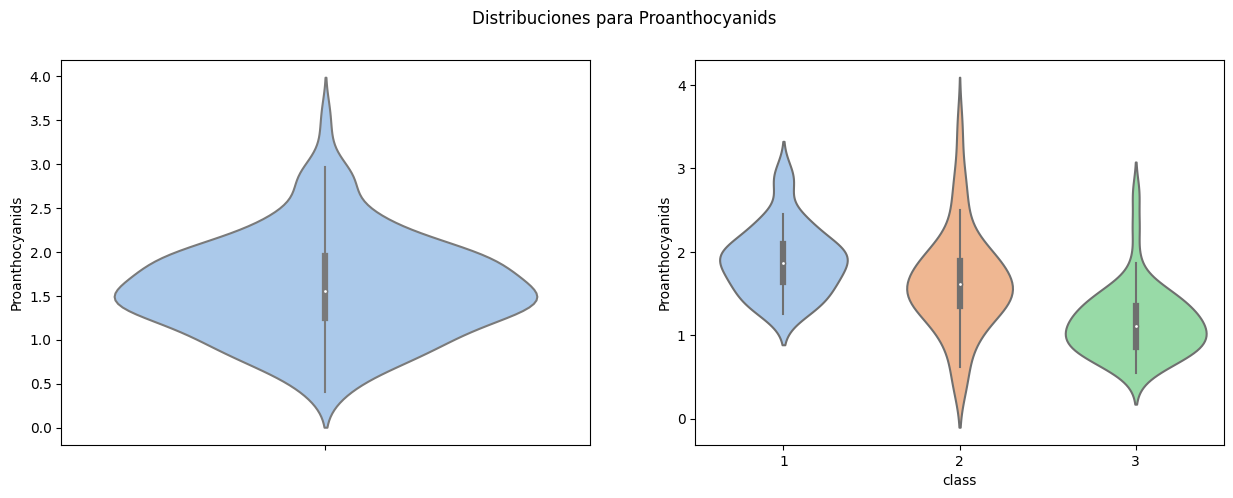

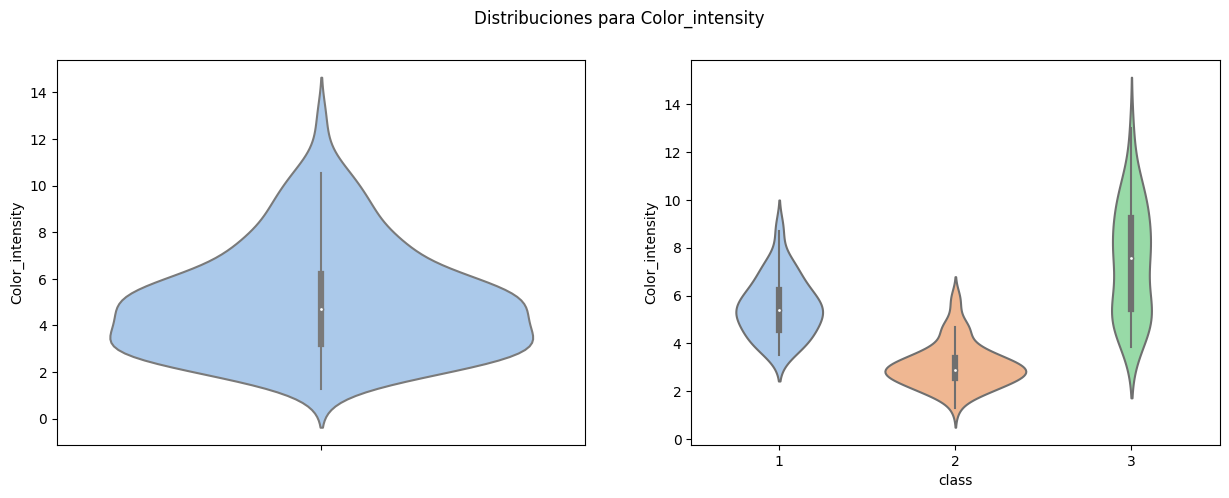

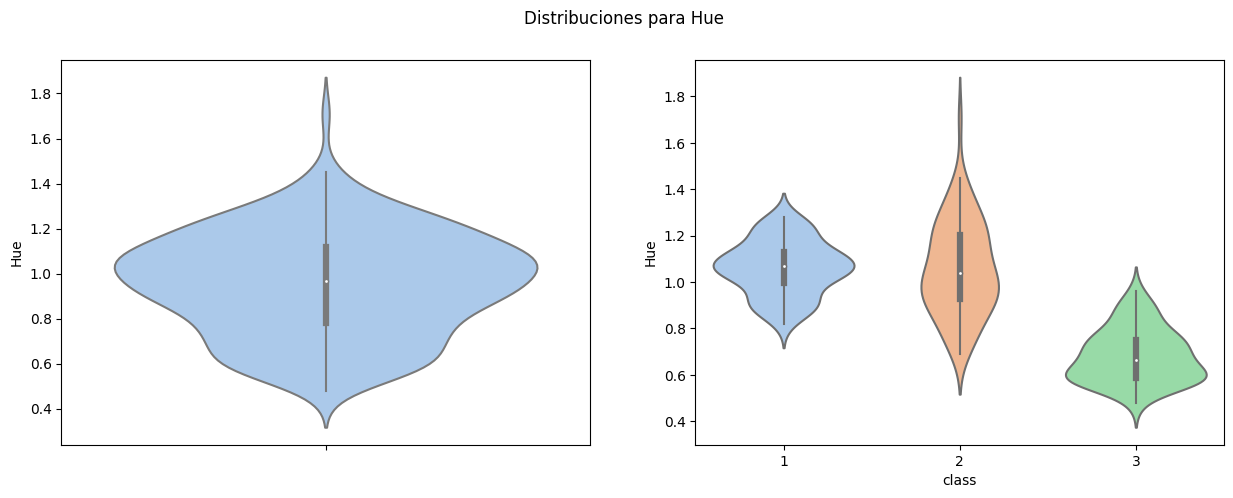

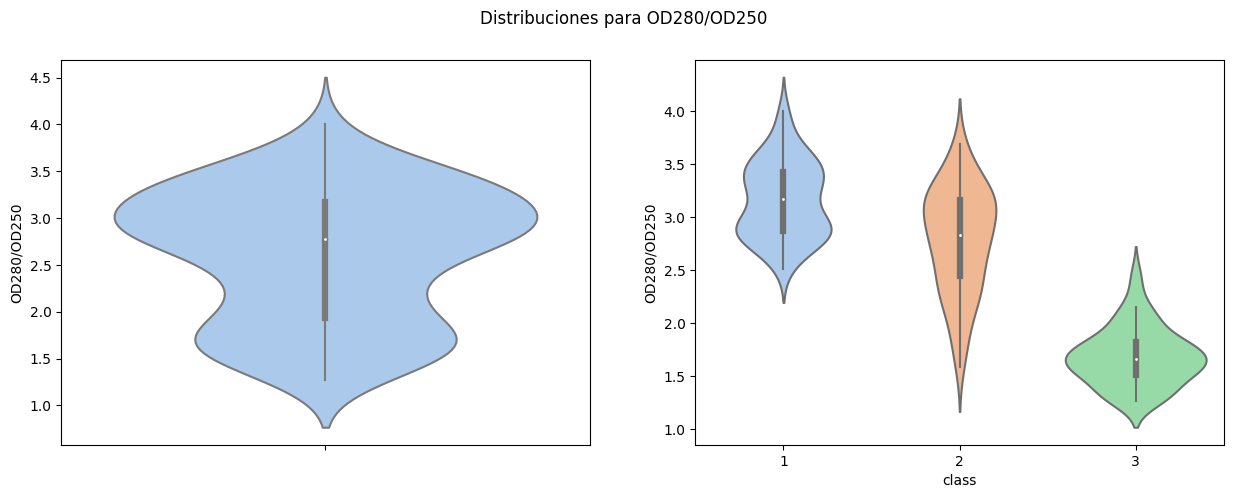

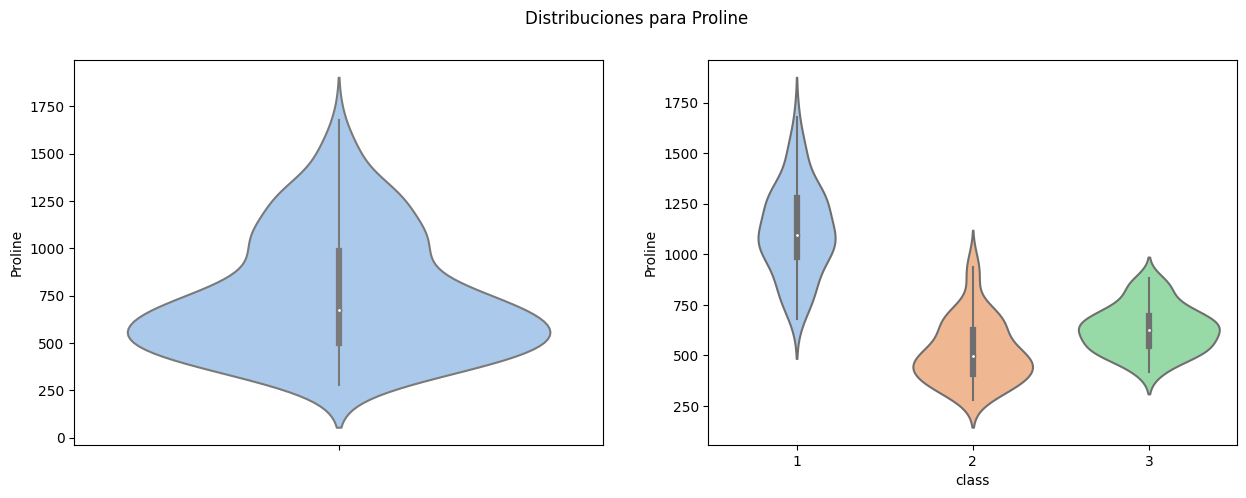

In [36]:

for value in DatosVino.columns:
    if value != 'class':
        fig,axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle(f'Distribuciones para {value}')
        sns.violinplot(ax = axes[0],data = DatosVino, y = value, palette = 'pastel')
        sns.violinplot(ax = axes[1], data = DatosVino, x = 'class', y = value, palette = 'pastel')
    else:
        plt.title('Distribución de clases de vino')
        sns.violinplot(data = DatosVino, y = value, palette = 'pastel')
        plt.show()
    

También se grafican las ditribuciones junto con un gráfico de puntos de las mediciones para identificar dónde están distribuidos

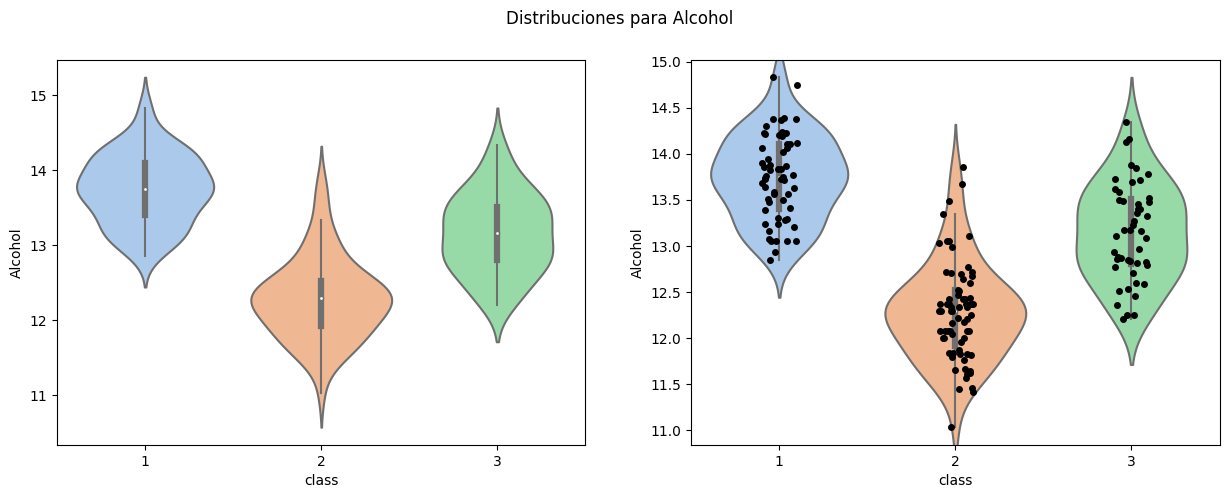

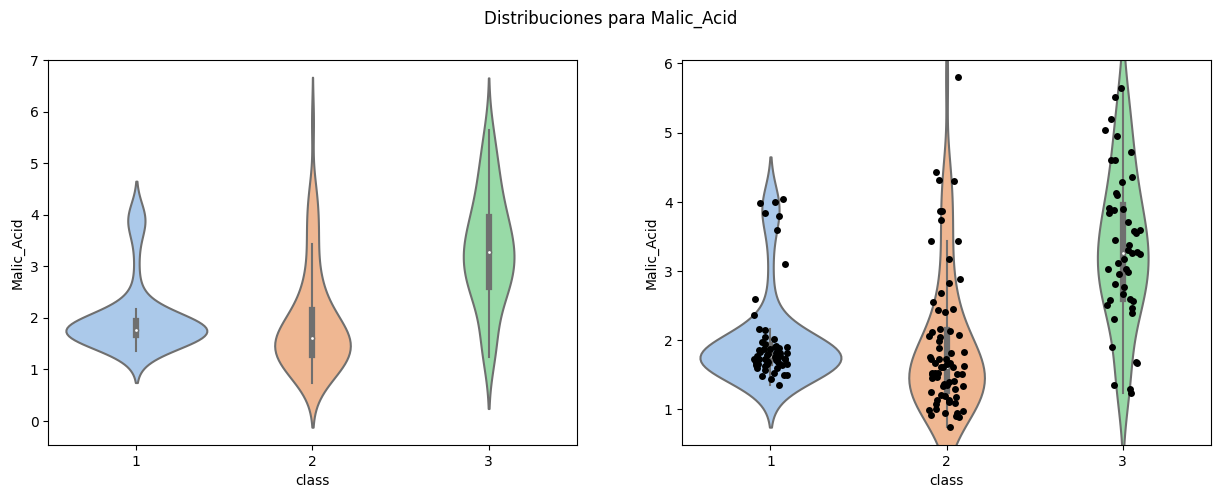

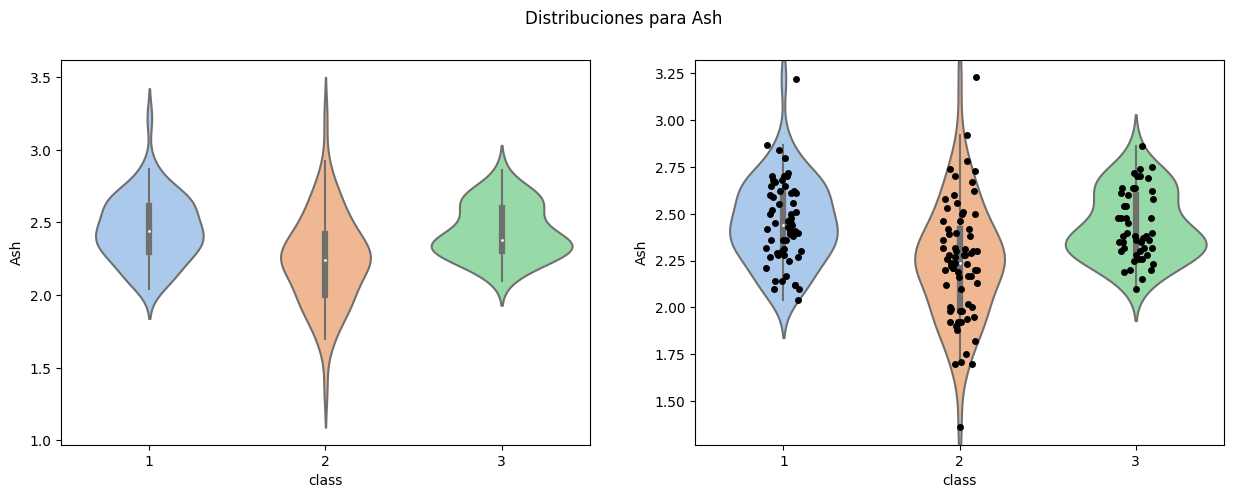

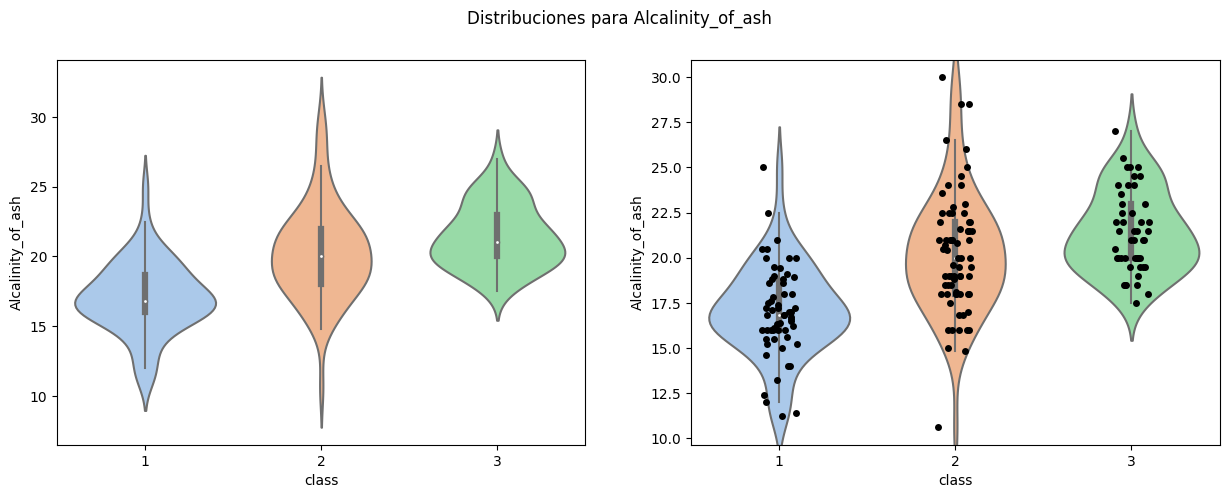

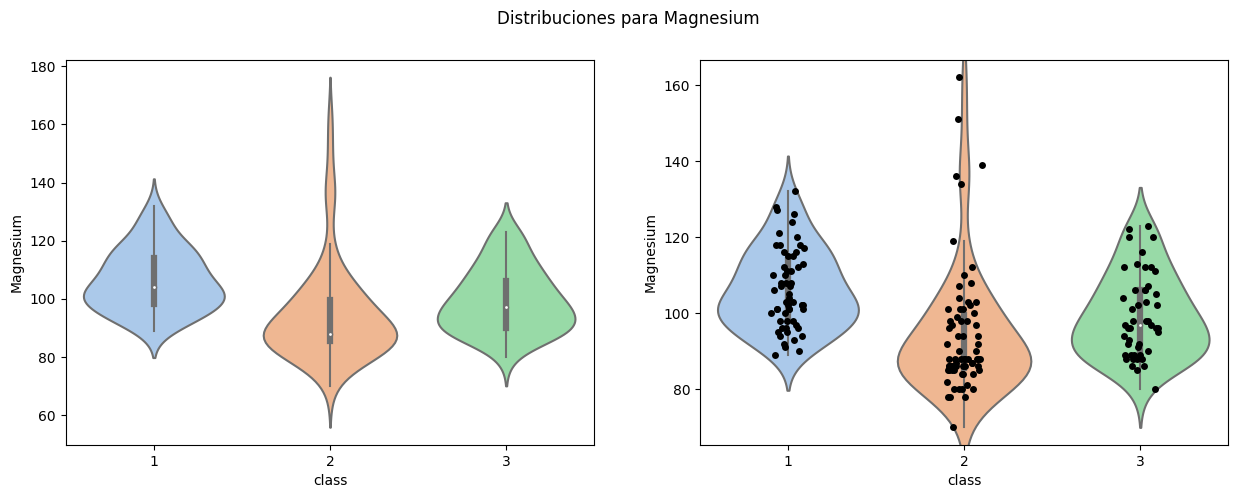

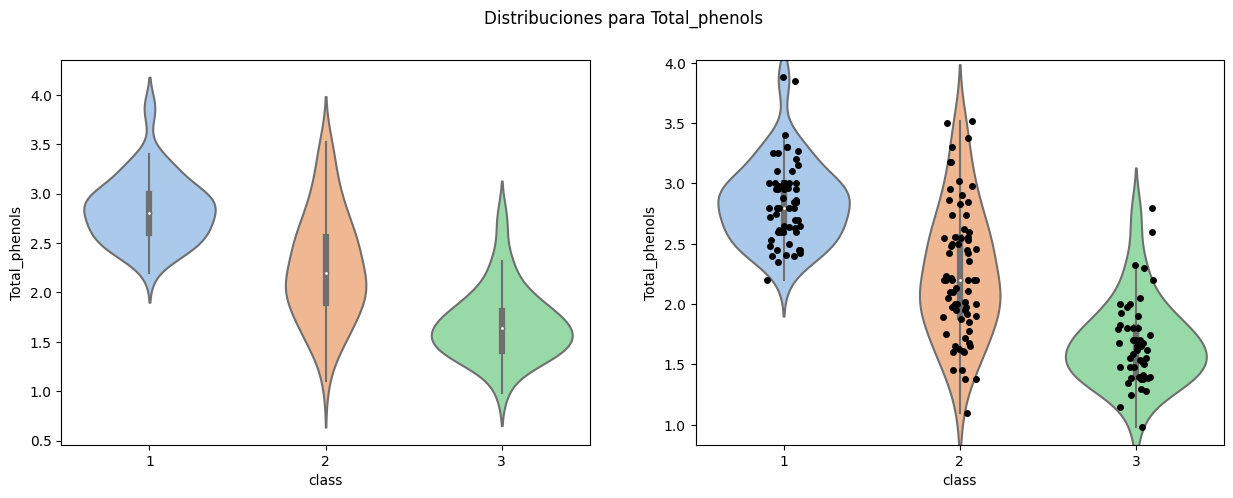

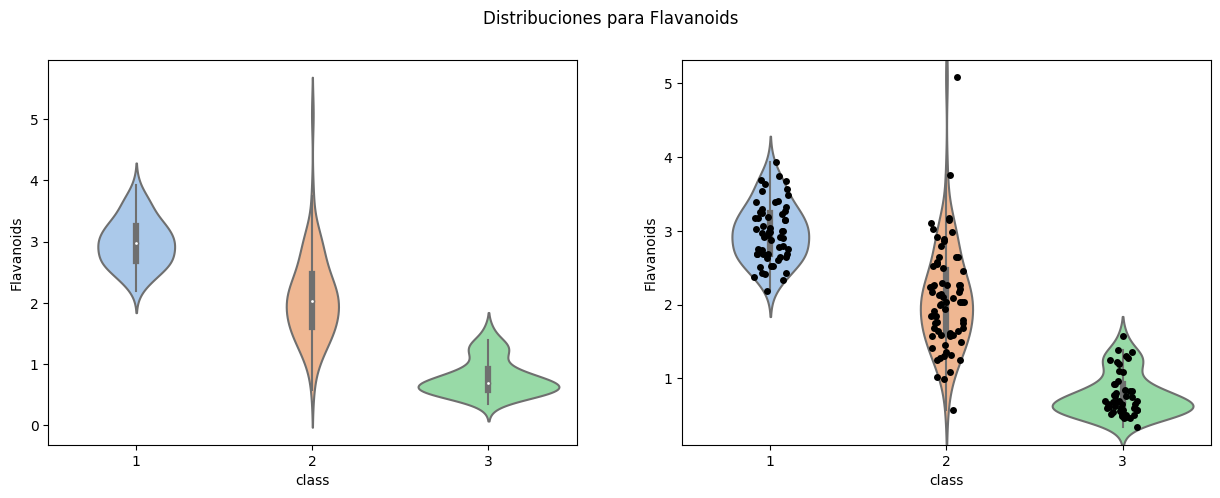

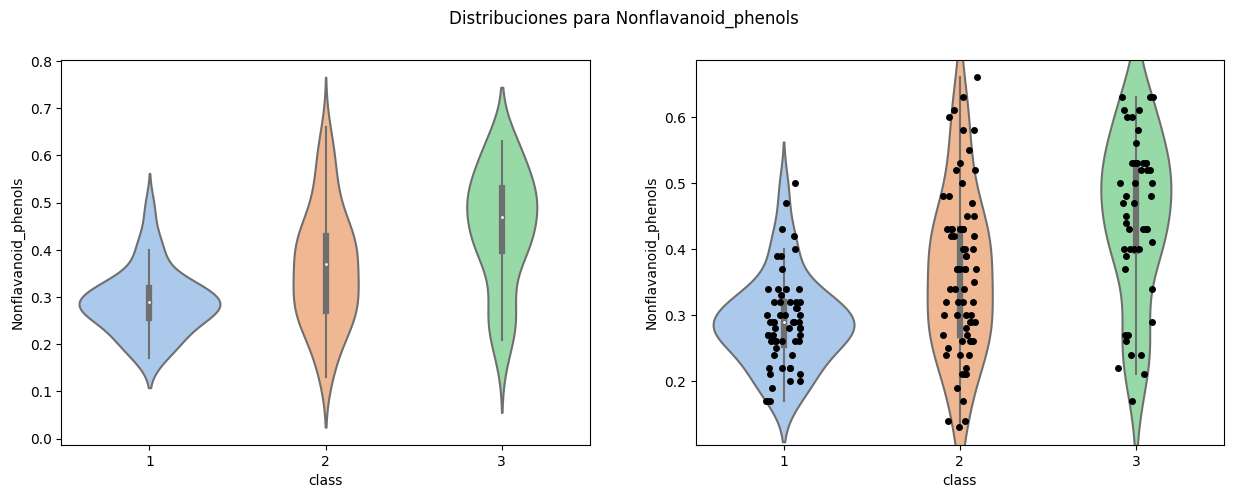

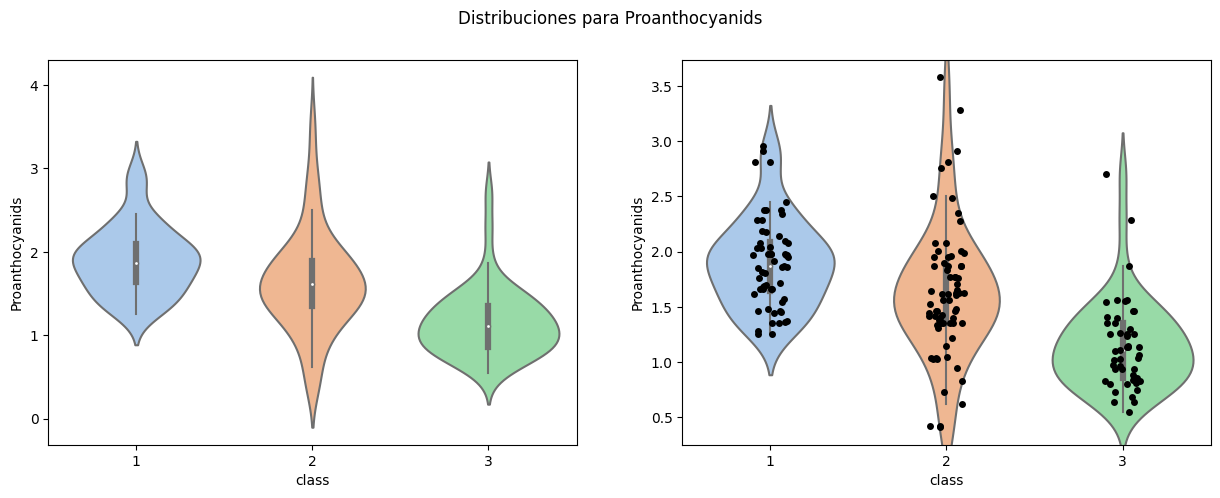

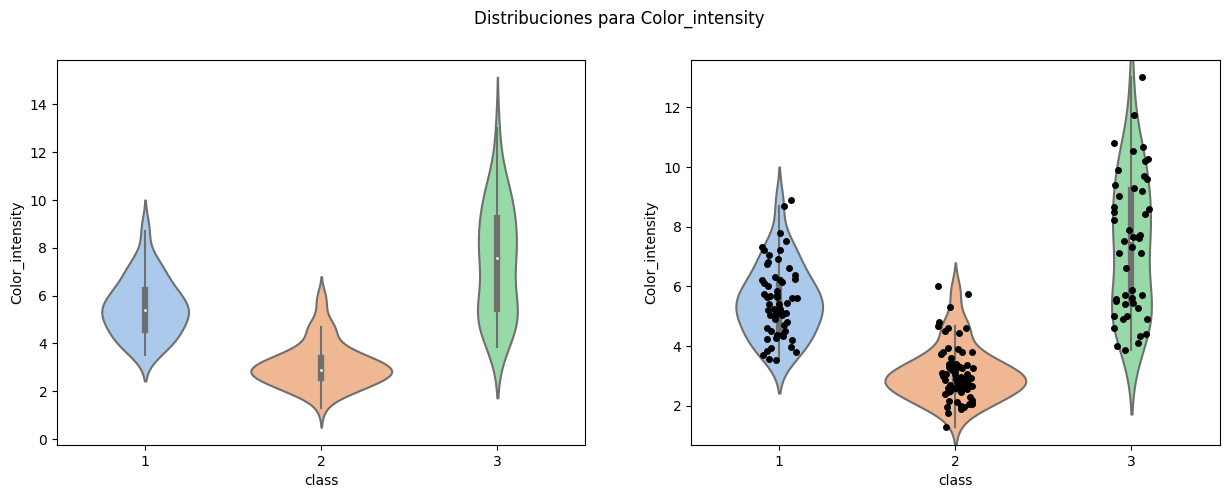

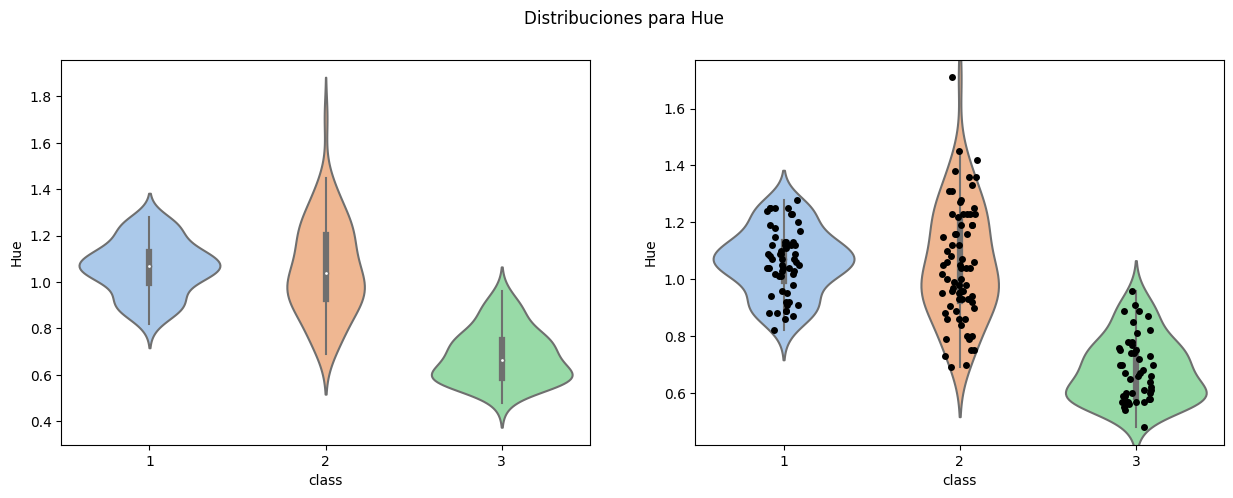

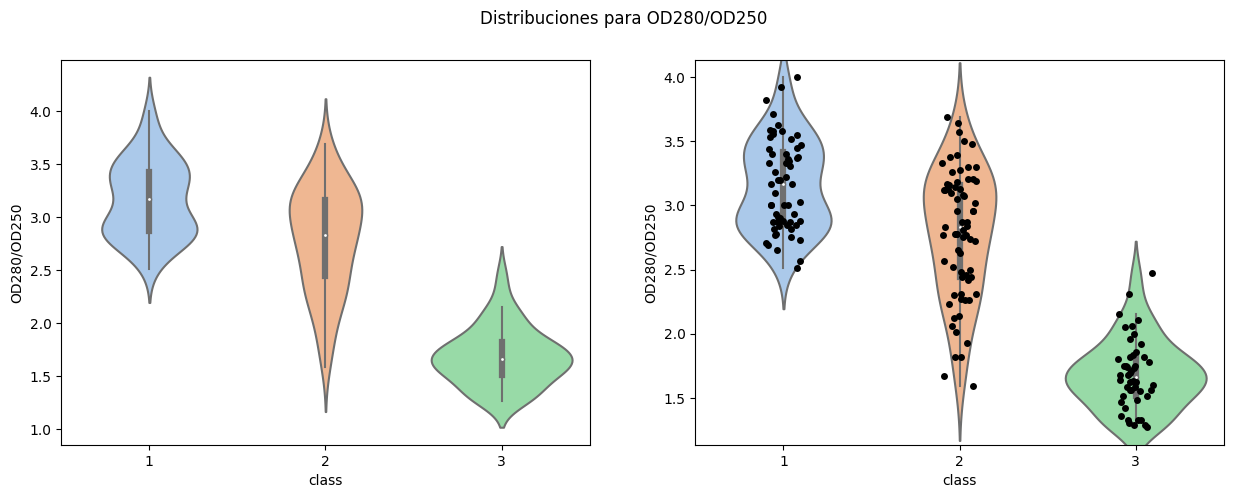

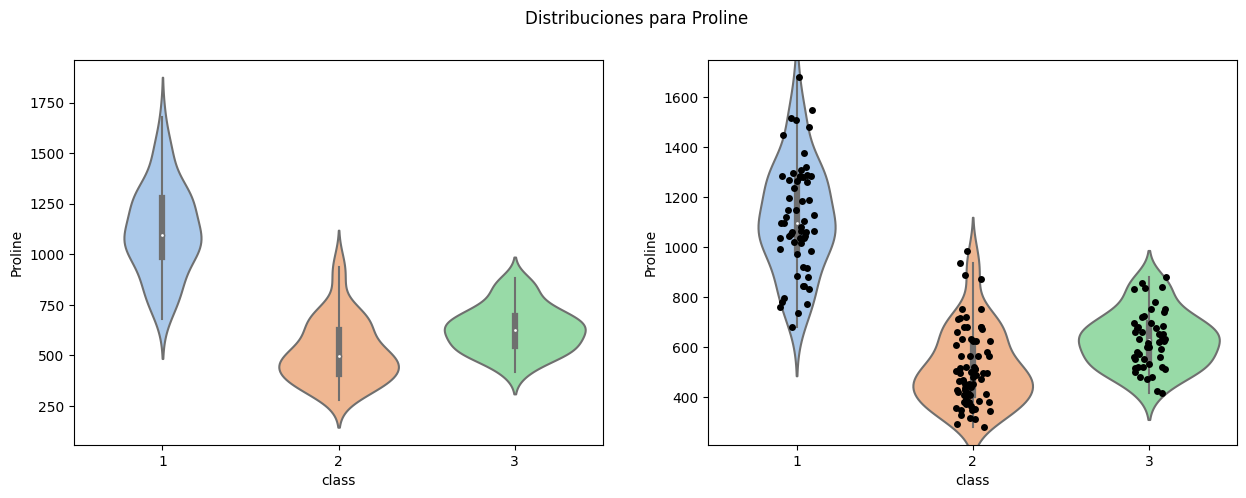

In [37]:
for value in DatosVino.columns:
    if value != 'class':
        fig,axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle(f'Distribuciones para {value}')
        sns.violinplot(ax = axes[0],data = DatosVino, x = 'class', y = value, palette = 'pastel')
        sns.violinplot(ax = axes[1], data = DatosVino, x = 'class', y = value, palette = 'pastel')
        sns.stripplot(ax = axes[1], data = DatosVino, x = 'class', y = value, color = 'black')

## Limpieza de datos

### Revisión de outliers

### Estandarización de datos

En la exploración, pudo notarse que no todas las variables están en la misma escala. Por ejemplo, Magnesio y Prolina están en el orden de las centenas, mientras que variables como cenizas están en las unidades. Esto puede resultar en sesgos en el peso de las variables al momento de utilizarlas en predicciones, por lo que es recomendable estandarizarlas.

In [38]:
VinoEstandar = DatosVino.copy()
VinoEstandar.head()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
VinoEstandarX = VinoEstandar.drop('class', axis = 1)
VinoEstandarX = (VinoEstandarX - VinoEstandarX.mean())/VinoEstandarX.std()
VinoEstandarX['class'] = VinoEstandar['class']
VinoEstandarX.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline,class
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,1
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,1
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,1
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,1
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,1


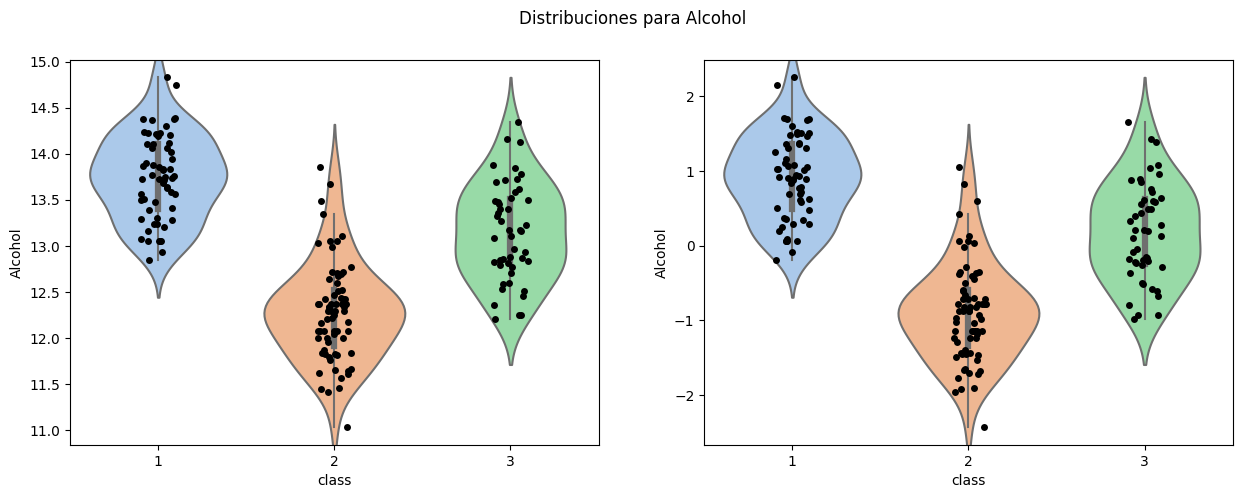

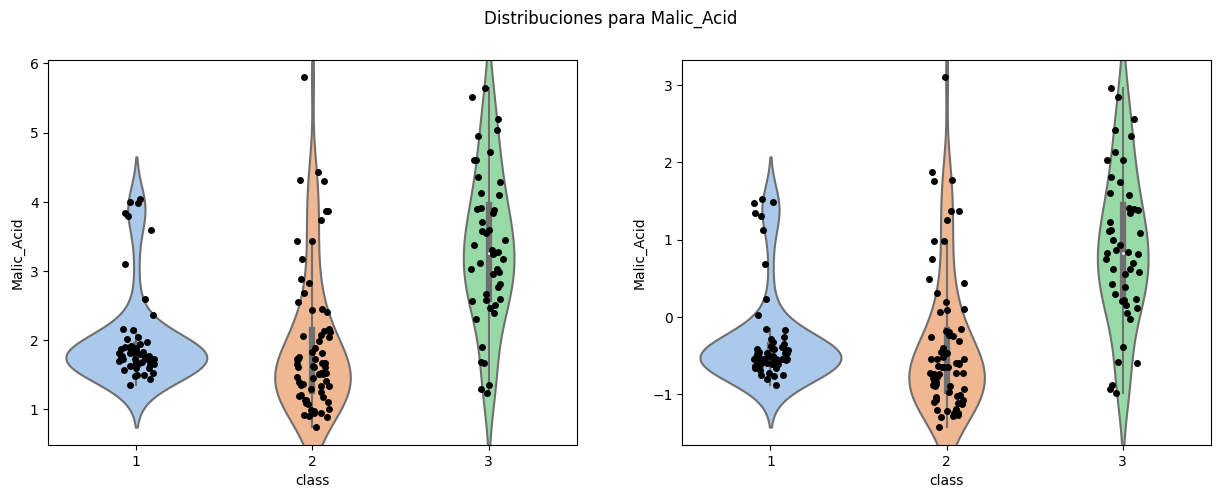

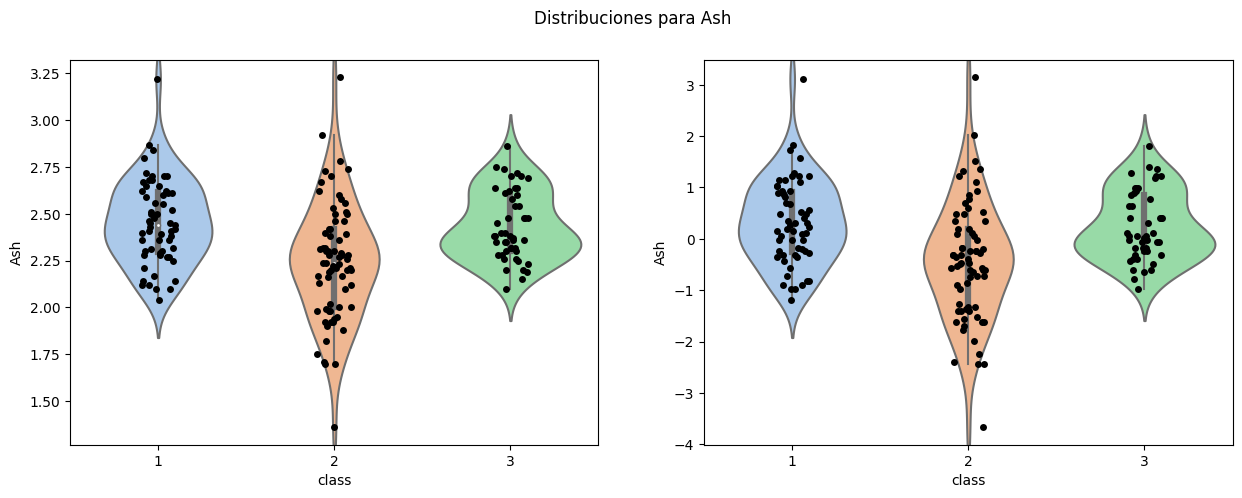

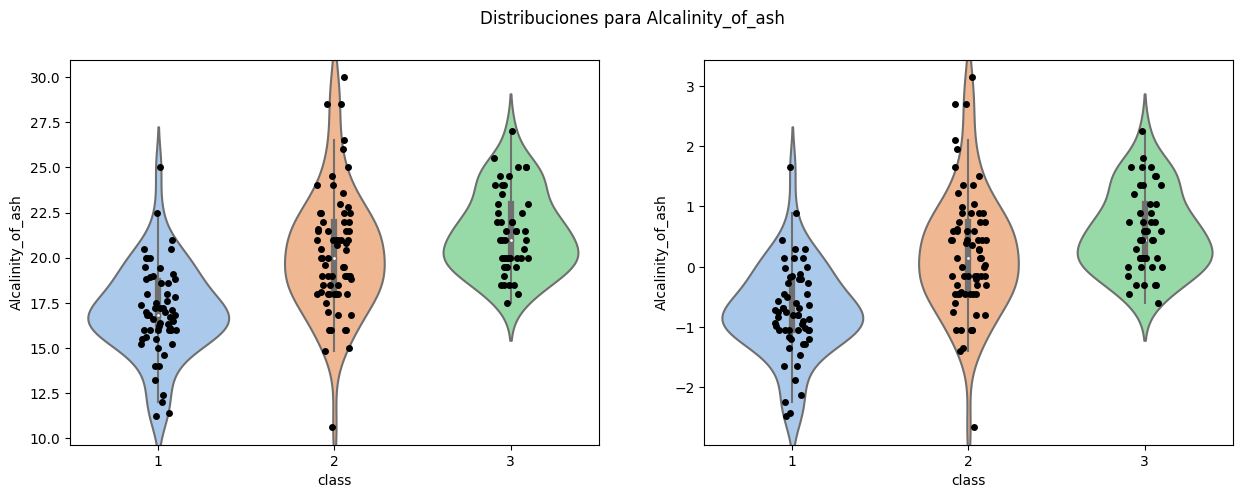

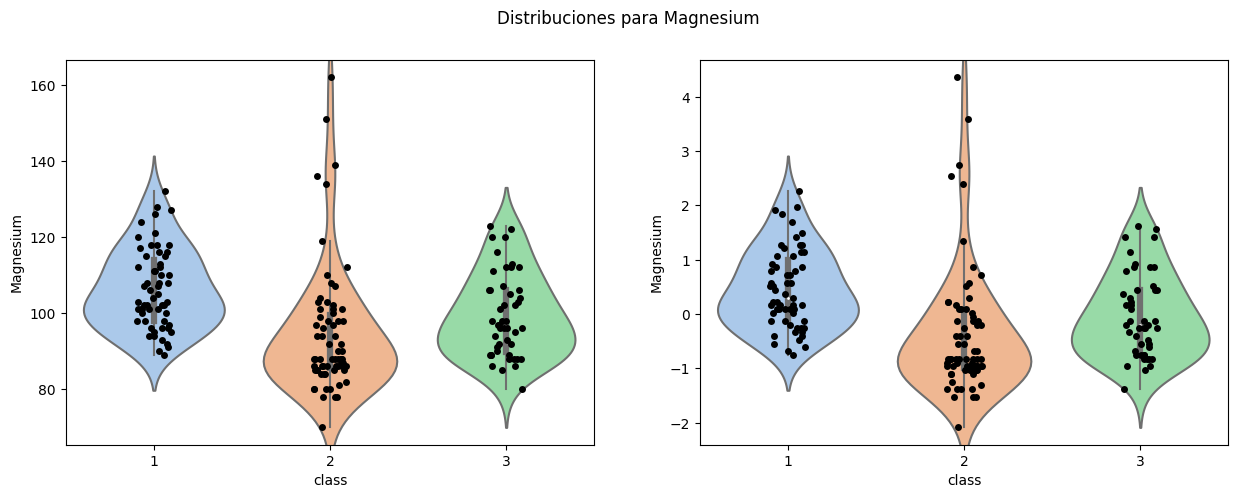

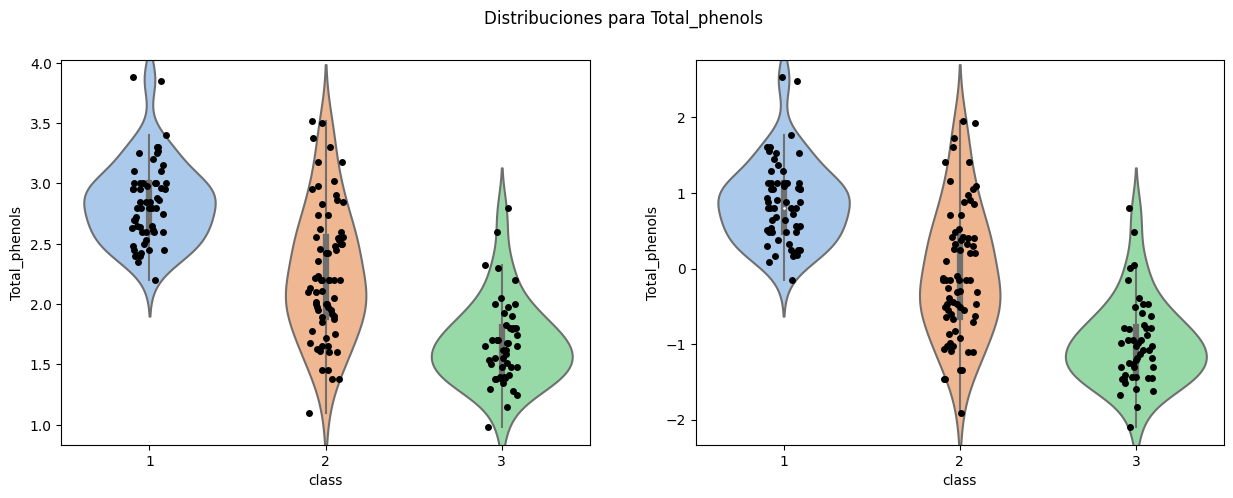

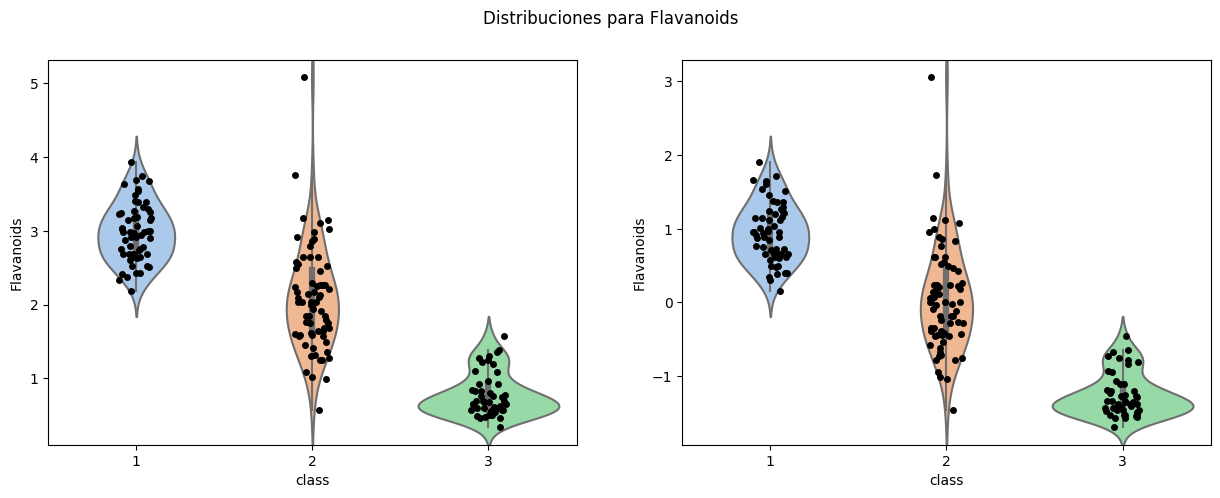

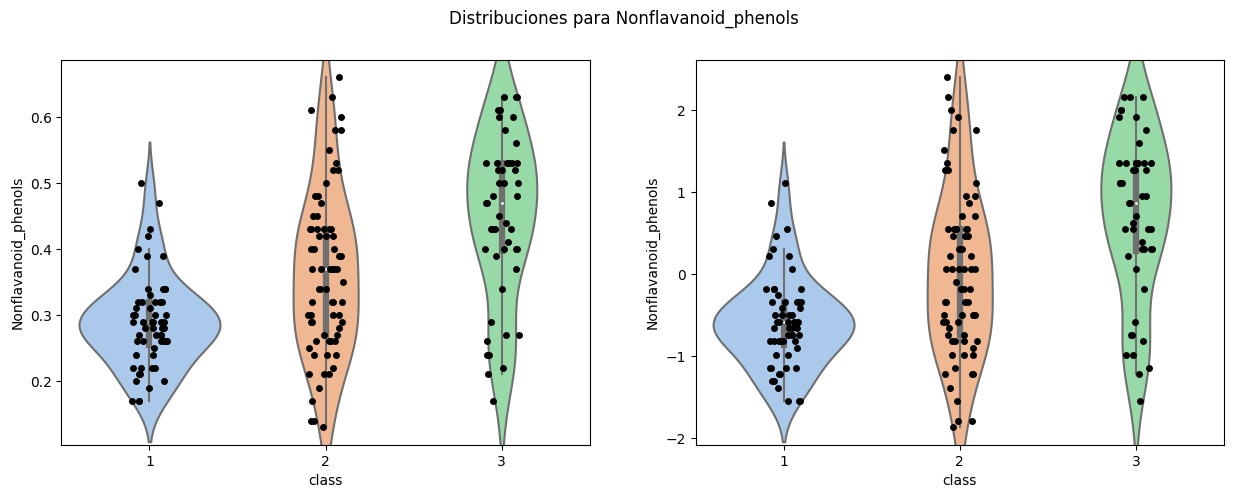

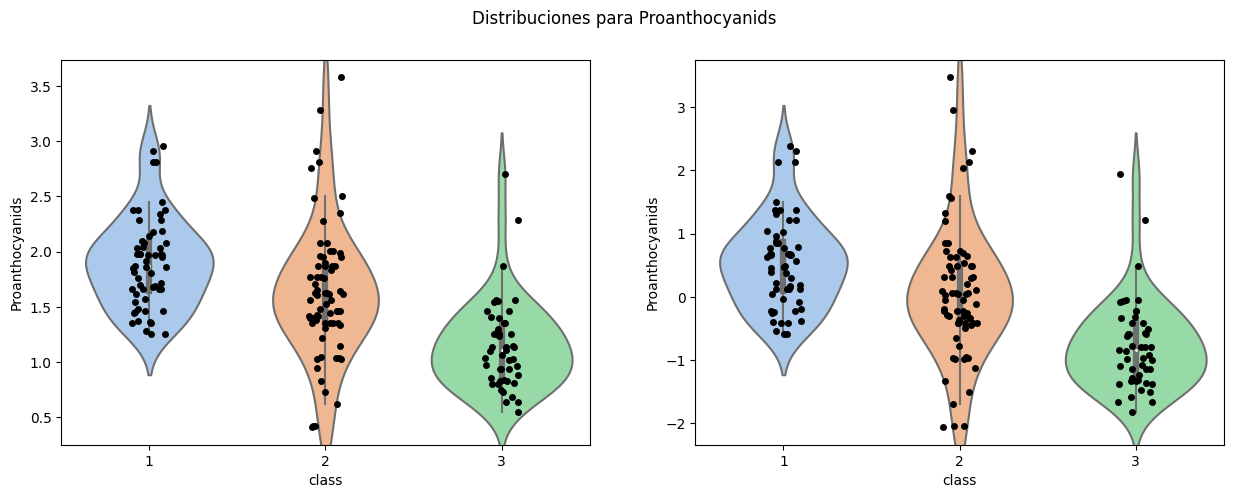

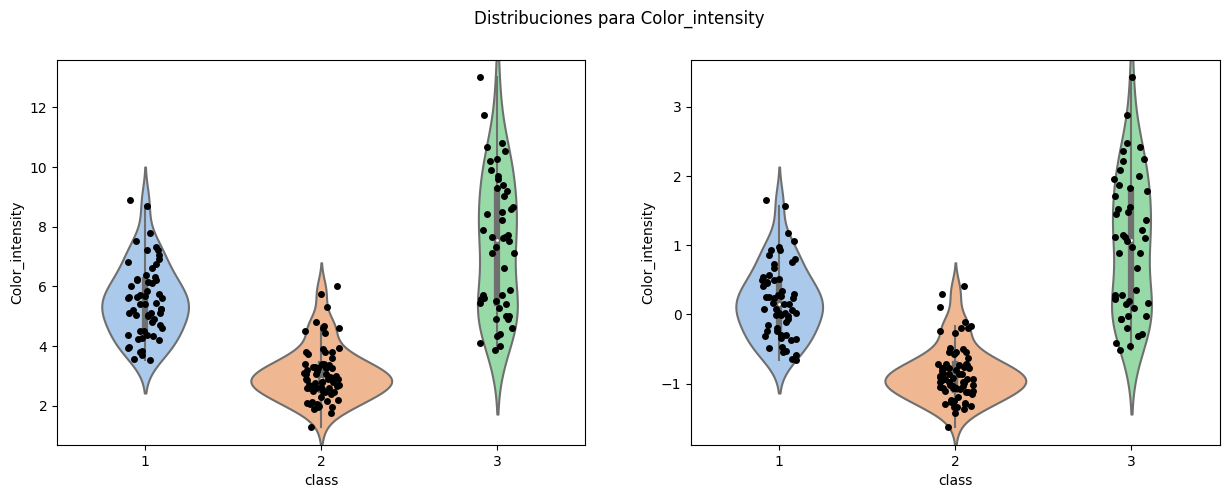

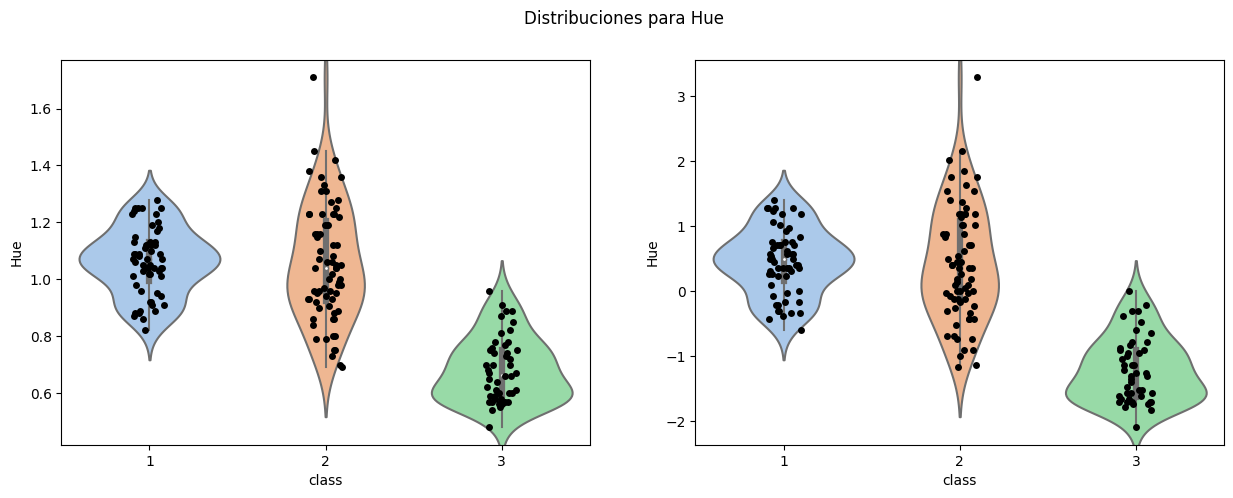

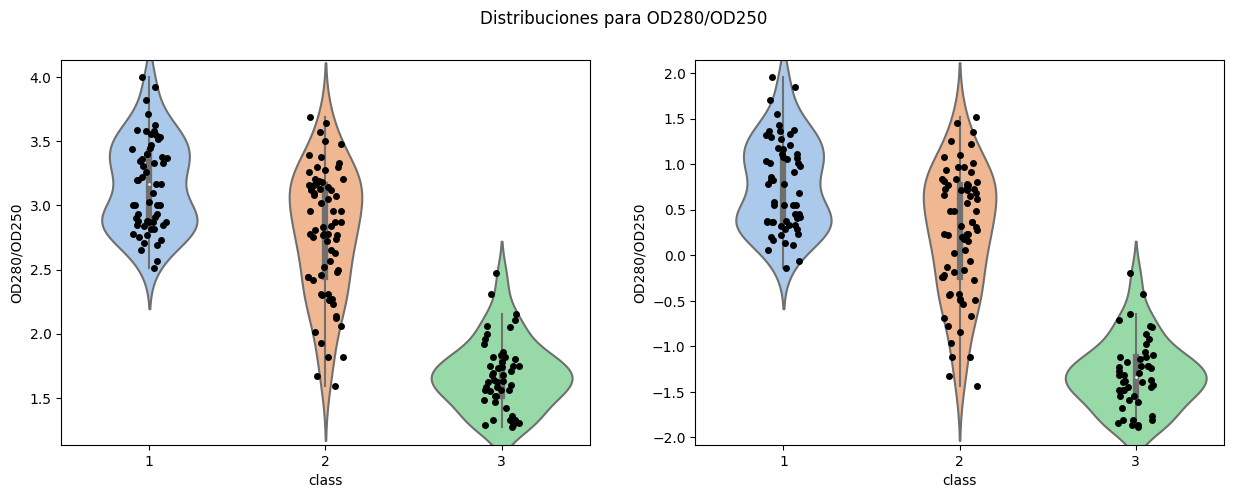

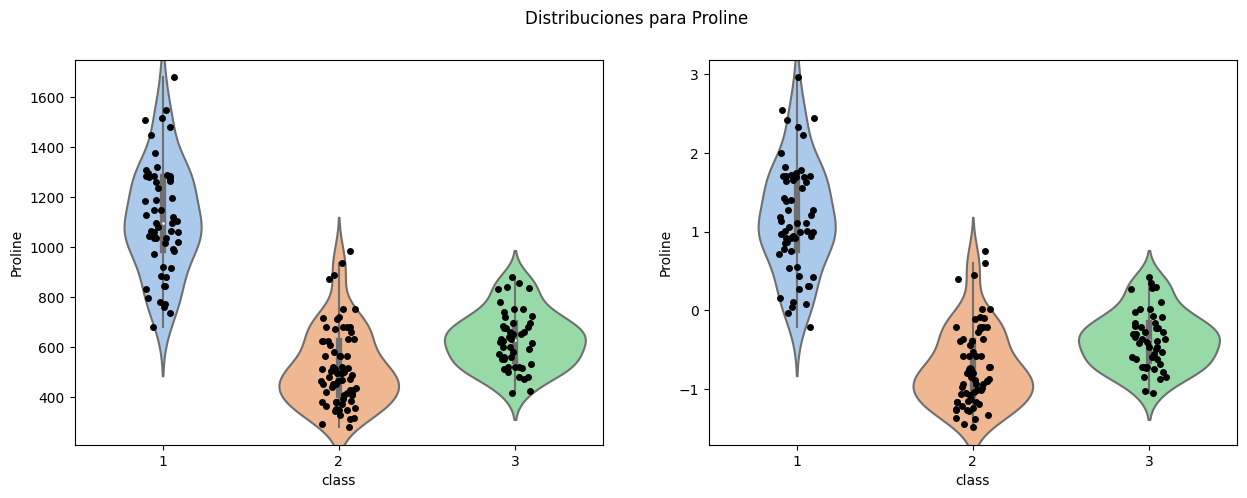

In [40]:
for value in DatosVino.columns:
    if value != 'class':
        fig,axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle(f'Distribuciones para {value}')
        sns.violinplot(ax = axes[0],data = VinoEstandar, x = 'class', y = value, palette = 'pastel')
        sns.stripplot(ax = axes[0], data = VinoEstandar, x = 'class', y = value, color = 'black')
        sns.violinplot(ax = axes[1], data = VinoEstandarX, x = 'class', y = value, palette = 'pastel')
        sns.stripplot(ax = axes[1], data = VinoEstandarX, x = 'class', y = value, color = 'black')

### Selección de dataset a utilizar

Se selecciona el dataset a utilizar en el modelo copiándolo a una nueva variable

In [41]:
VinoFinal = VinoEstandarX.copy()

## Modelo a utilizar

Debido a la naturaleza de las variables independientes dentro de este dataset, se determinó que lo mejor es utilizar un modelo de clasificación, y el elegido fue KNN. Se optó por KNN debido a que los datos no son variables discretas, sino más bien valores continuos. Esto hace que modelos como Decision Trees no puedan ser utilizados, pero es donde los modelos como KNN relucen.

Además, se desea realizar el análisis con los datos estandarizados y no estandarizados. De esta manera, se podrá observar si este proceso influye en la accuracy del modelo.

Como parte del análisis de la efectividad del modelo a utilizar, se realizarán las mismas pruebas utilizando un modelo de K-means. Finalmente se comparará con qué modelo arrojó mejores resultados

### Modelo KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [48]:
ks = 20
b = []
b.append('Random_state')
a = np.arange(1,ks, step = 1)

for value in a:
    b.append(str(value)) 
Accuracies = pd.DataFrame(columns = b)
SDs = pd.DataFrame(columns = b)

In [44]:


X = VinoFinal.drop('class', axis = 1)
Y = VinoFinal['class']



In [63]:
ks = 20
AccMedia = np.zeros((ks-1))
SdAcc = np.zeros((ks-1))
Splits = 50
for m in range(0,Splits):
    AccRow = np.zeros(ks)
    SDRow = np.zeros(ks)
    AccRow[0] = m
    SDRow[0] = m
    AccMedia = np.zeros((ks-1))
    SdAcc = np.zeros((ks-1))
    XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.5, random_state = m)
    for n in range(1,ks):
        Result = KNeighborsClassifier(n_neighbors=n).fit(XTrain,YTrain)
        YTestP = Result.predict(XTest)
        AccRow[n] = metrics.accuracy_score(YTest, YTestP)
        SDRow[n]=np.std(YTestP==YTest)/np.sqrt(YTestP.shape[0])
    Accuracies.loc[len(Accuracies)] = AccRow
    SDs.loc[len(SDs)] = SDRow


In [65]:
Accuracies.sample(10)

,Random_state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.921348,0.876404,0.932584,0.921348,0.955056,0.943820,0.943820,0.932584,0.932584,0.932584,0.943820,0.932584,0.943820,0.943820,0.943820,0.921348,0.943820,0.943820,0.943820
54,46.0,0.932584,0.921348,0.910112,0.921348,0.921348,0.921348,0.910112,0.910112,0.910112,0.932584,0.910112,0.932584,0.910112,0.932584,0.921348,0.932584,0.932584,0.932584,0.932584
37,29.0,0.910112,0.921348,0.932584,0.943820,0.966292,0.943820,0.955056,0.932584,0.932584,0.943820,0.943820,0.943820,0.943820,0.955056,0.966292,0.955056,0.966292,0.943820,0.943820
39,31.0,0.943820,0.932584,0.932584,0.921348,0.910112,0.910112,0.932584,0.932584,0.955056,0.932584,0.955056,0.955056,0.977528,0.966292,0.977528,0.955056,0.966292,0.966292,0.977528
3,3.0,0.921348,0.932584,0.943820,0.943820,0.977528,0.966292,0.955056,0.966292,0.977528,0.977528,0.977528,0.955056,0.977528,0.977528,0.966292,0.966292,0.966292,0.955056,0.955056
53,45.0,0.955056,0.943820,0.977528,0.988764,0.977528,0.966292,0.977528,0.977528,0.977528,0.977528,0.977528,0.977528,0.977528,0.977528,0.988764,0.988764,0.988764,0.988764,0.988764
20,12.0,0.966292,0.955056,0.943820,0.943820,0.966292,0.966292,0.977528,0.966292,0.966292,0.966292,0.977528,0.977528,0.966292,0.966292,0.966292,0.955056,0.966292,0.966292,0.955056
56,48.0,0.943820,0.932584,0.955056,0.932584,0.955056,0.955056,0.955056,0.955056,0.943820,0.943820,0.943820,0.932584,0.943820,0.932584,0.943820,0.943820,0.943820,0.943820,0.921348
16,8.0,0.955056,0.943820,0.977528,0.977528,0.988764,0.977528,0.988764,0.977528,0.977528,0.977528,0.988764,0.977528,0.977528,0.966292,0.988764,0.988764,0.988764,0.966292,0.977528
10,2.0,0.955056,0.932584,0.955056,0.932584,0.966292,0.955056,0.977528,0.977528,0.977528,0.977528,0.988764,0.988764,0.988764,0.988764,0.988764,0.988764,0.988764,0.988764,0.988764


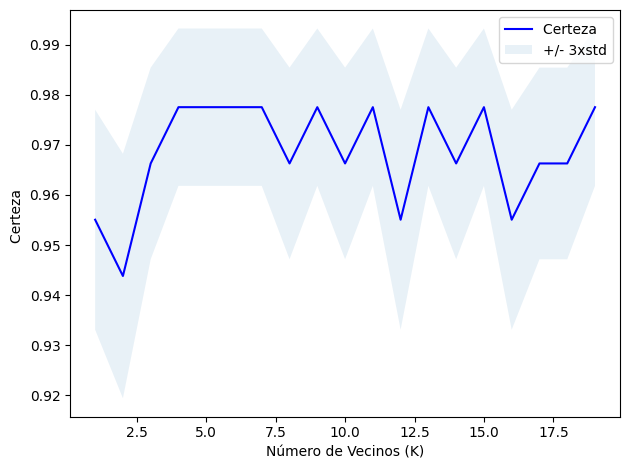

In [46]:
plt.plot(range(1,ks),AccMedia,'b')
plt.fill_between(range(1,ks),AccMedia - 1 * SdAcc,AccMedia + 1 * SdAcc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

#### Modelo sin datos estandarizados

#### Modelo con datos estandarizados

### Modelo K-means

Para comparar otros modelos, se utilizará el modelo de K-means, y se comparará 

#### Modelo sin datos estandarizados

#### Modelo con datos estandarizados

### Comparación entre modelos

## Conclusiones